<a href="https://colab.research.google.com/github/akshaay729-droid/YBI-Project/blob/main/acne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from google.colab import files
import tensorflow as tf
from PIL import Image

# Step 1: Upload images (Acne and Non-Acne)
# Upload acne images
print("Upload Acne Images:")
uploaded_acne_files = files.upload()

# Upload non-acne images
print("Upload Non-Acne Images:")
uploaded_non_acne_files = files.upload()

# Step 2: Preprocess Images
def preprocess_images(files_list):
    images = []
    for file in files_list:
        img = Image.open(file)  # Open the image file
        img = img.convert("RGB")  # Convert to RGB to ensure 3 channels
        img_resized = img.resize((224, 224))  # Resize to match model input size
        img_array = img_to_array(img_resized)  # Convert to numpy array
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        images.append(img_array)
    return np.vstack(images)

acne_images = preprocess_images(uploaded_acne_files.keys())
non_acne_images = preprocess_images(uploaded_non_acne_files.keys())

# Step 3: Prepare Data Labels
acne_labels = np.ones(acne_images.shape[0])
non_acne_labels = np.zeros(non_acne_images.shape[0])

# Combine images and labels
images = np.vstack((acne_images, non_acne_images))
labels = np.concatenate((acne_labels, non_acne_labels))

# Step 4: Build the CNN Model
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 5: Train the Model
model = create_model()
model.fit(images, labels, epochs=5, batch_size=32)

# Step 6: Upload Multiple New Images for Prediction
print("Upload Multiple New Images to Classify:")
uploaded_new_files = files.upload()

# Step 7: Preprocess and Predict Multiple New Images
def classify_images(files_list):
    predictions = []
    for file in files_list:
        new_image = Image.open(file)  # Open the uploaded new image
        new_image = new_image.convert("RGB")  # Convert to RGB to ensure 3 channels
        new_image_resized = new_image.resize((224, 224))  # Resize to match model input size
        new_image_array = img_to_array(new_image_resized)
        new_image_array = np.expand_dims(new_image_array, axis=0)  # Add batch dimension

        # Predict the class of the new image
        prediction = model.predict(new_image_array)

        # Append the result to predictions
        if prediction[0] > 0.5:
            predictions.append((file, "Acne"))
        else:
            predictions.append((file, "Non-Acne"))
    return predictions

# Classify the uploaded new images
predictions = classify_images(uploaded_new_files.keys())

# Output the predictions
for file, prediction in predictions:
    print(f"Image {file} is classified as: {prediction}")


Upload Acne Images:


Saving rosacea-nose-6.jpg to rosacea-nose-6 (3).jpg
Saving rosacea-nose-7.jpg to rosacea-nose-7 (3).jpg
Saving rosacea-nose-49.jpg to rosacea-nose-49 (3).jpg
Saving rosacea-steroid-1.jpg to rosacea-steroid-1 (3).jpg
Saving rosacea-steroid-8.jpg to rosacea-steroid-8 (3).jpg
Saving sn7_commonacne-8col.ashx to sn7_commonacne-8col (3).ashx
Saving teenage-skin-problems-183876012-5a245c86494ec900372b6366 (2).jpg to teenage-skin-problems-183876012-5a245c86494ec900372b6366 (2) (3).jpg
Saving teenage-skin-problems-183876012-5a245c86494ec900372b6366.jpg to teenage-skin-problems-183876012-5a245c86494ec900372b6366 (4).jpg
Saving tr0muse3x9yz.png to tr0muse3x9yz (3).png
Saving tumblr_npa77rk2UW1r8l3gko1_400 (1).png to tumblr_npa77rk2UW1r8l3gko1_400 (1) (3).png
Saving tumblr_npa77rk2UW1r8l3gko1_400.png to tumblr_npa77rk2UW1r8l3gko1_400 (4).png
Saving tumblr_ov7rm75Zwo1wuhvt8o1_640.jpg to tumblr_ov7rm75Zwo1wuhvt8o1_640 (3).jpg
Saving u06kz58buhi11.png to u06kz58buhi11 (3).png
Saving uaxnc5tsay351.jpg

Saving images (14).jpeg to images (14) (2).jpeg
Saving images (13).jpeg to images (13) (2).jpeg
Saving images (12).jpeg to images (12) (2).jpeg
Saving images (11).jpeg to images (11) (2).jpeg
Saving images (10).jpeg to images (10) (2).jpeg
Saving images (9).jpeg to images (9) (2).jpeg
Saving images (8).jpeg to images (8) (2).jpeg
Saving images (7).jpeg to images (7) (2).jpeg
Saving images (6).jpeg to images (6) (2).jpeg
Saving images (5).jpeg to images (5) (2).jpeg
Saving images (4).jpeg to images (4) (2).jpeg
Saving images (3).jpeg to images (3) (2).jpeg
Saving images (2).jpeg to images (2) (2).jpeg
Saving images (1).jpeg to images (1) (2).jpeg
Saving images.jpeg to images (16).jpeg
Saving download (1).jpeg to download (1) (2).jpeg
Saving download.jpeg to download (3).jpeg
Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 787ms/step - accuracy: 0.4188 - loss: 1051.6907
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 796ms/step - accuracy: 0.5708 - loss: 2366.8303
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 791ms

Saving rosacea-53 - Copy.jpg to rosacea-53 - Copy.jpg
Saving rosacea-53.jpg to rosacea-53.jpg
Saving download.jpeg to download (4).jpeg
Saving Get-glowing-and-Acne-free-clear-skin-with-the-help-of-a-Dermatologist - Copy.jpg to Get-glowing-and-Acne-free-clear-skin-with-the-help-of-a-Dermatologist - Copy.jpg
Saving Get-glowing-and-Acne-free-clear-skin-with-the-help-of-a-Dermatologist.jpg to Get-glowing-and-Acne-free-clear-skin-with-the-help-of-a-Dermatologist.jpg
Saving How-To-Get-Clear-And-Spotless-Skin.jpg to How-To-Get-Clear-And-Spotless-Skin.jpg
Saving acne image.jpeg to acne image.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Image rosacea-53 - Copy.jpg is classified as: Acne
Image rosacea-53.jpg is classified as: Acne
Image download (4).jpeg is classified as: N

In [ ]:
# Install graphviz library
!pip install graphviz

from graphviz import Digraph

# Create a directed graph
flowchart = Digraph(format='png', name="Acne Detection System Workflow")

# Define nodes
flowchart.node("Start", "Start", shape="ellipse", style="filled", color="lightblue")
flowchart.node("UploadImages", "Upload Images\n(Acne and Non-Acne)", shape="box", style="rounded,filled", color="lightyellow")
flowchart.node("Preprocess", "Preprocess Images\n(Resize, Normalize)", shape="box", style="rounded,filled", color="lightyellow")
flowchart.node("LabelData", "Label Data\n(Acne=1, Non-Acne=0)", shape="box", style="rounded,filled", color="lightyellow")
flowchart.node("TrainModel", "Train CNN Model", shape="box", style="rounded,filled", color="lightyellow")
flowchart.node("UploadNewImages", "Upload New Images", shape="box", style="rounded,filled", color="lightyellow")
flowchart.node("Classify", "Classify Images\n(Acne or Non-Acne)", shape="box", style="rounded,filled", color="lightyellow")
flowchart.node("Result", "Display Results", shape="ellipse", style="filled", color="lightgreen")

# Add edges
flowchart.edges([
    ("Start", "UploadImages"),
    ("UploadImages", "Preprocess"),
    ("Preprocess", "LabelData"),
    ("LabelData", "TrainModel"),
    ("TrainModel", "UploadNewImages"),
    ("UploadNewImages", "Classify"),
    ("Classify", "Result")
])

# Save and render the flowchart
flowchart.render("Acne_Detection_Workflow", view=True)


'Acne_Detection_Workflow.png'

In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # For binary classification (acne or non-acne)
])

# Display the summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 173056)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │      11,075,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,132,033 (42.47 MB)

 Trainable params: 11,132,033 (42.47 MB)

 Non-trainable params: 0 (0.00 B)

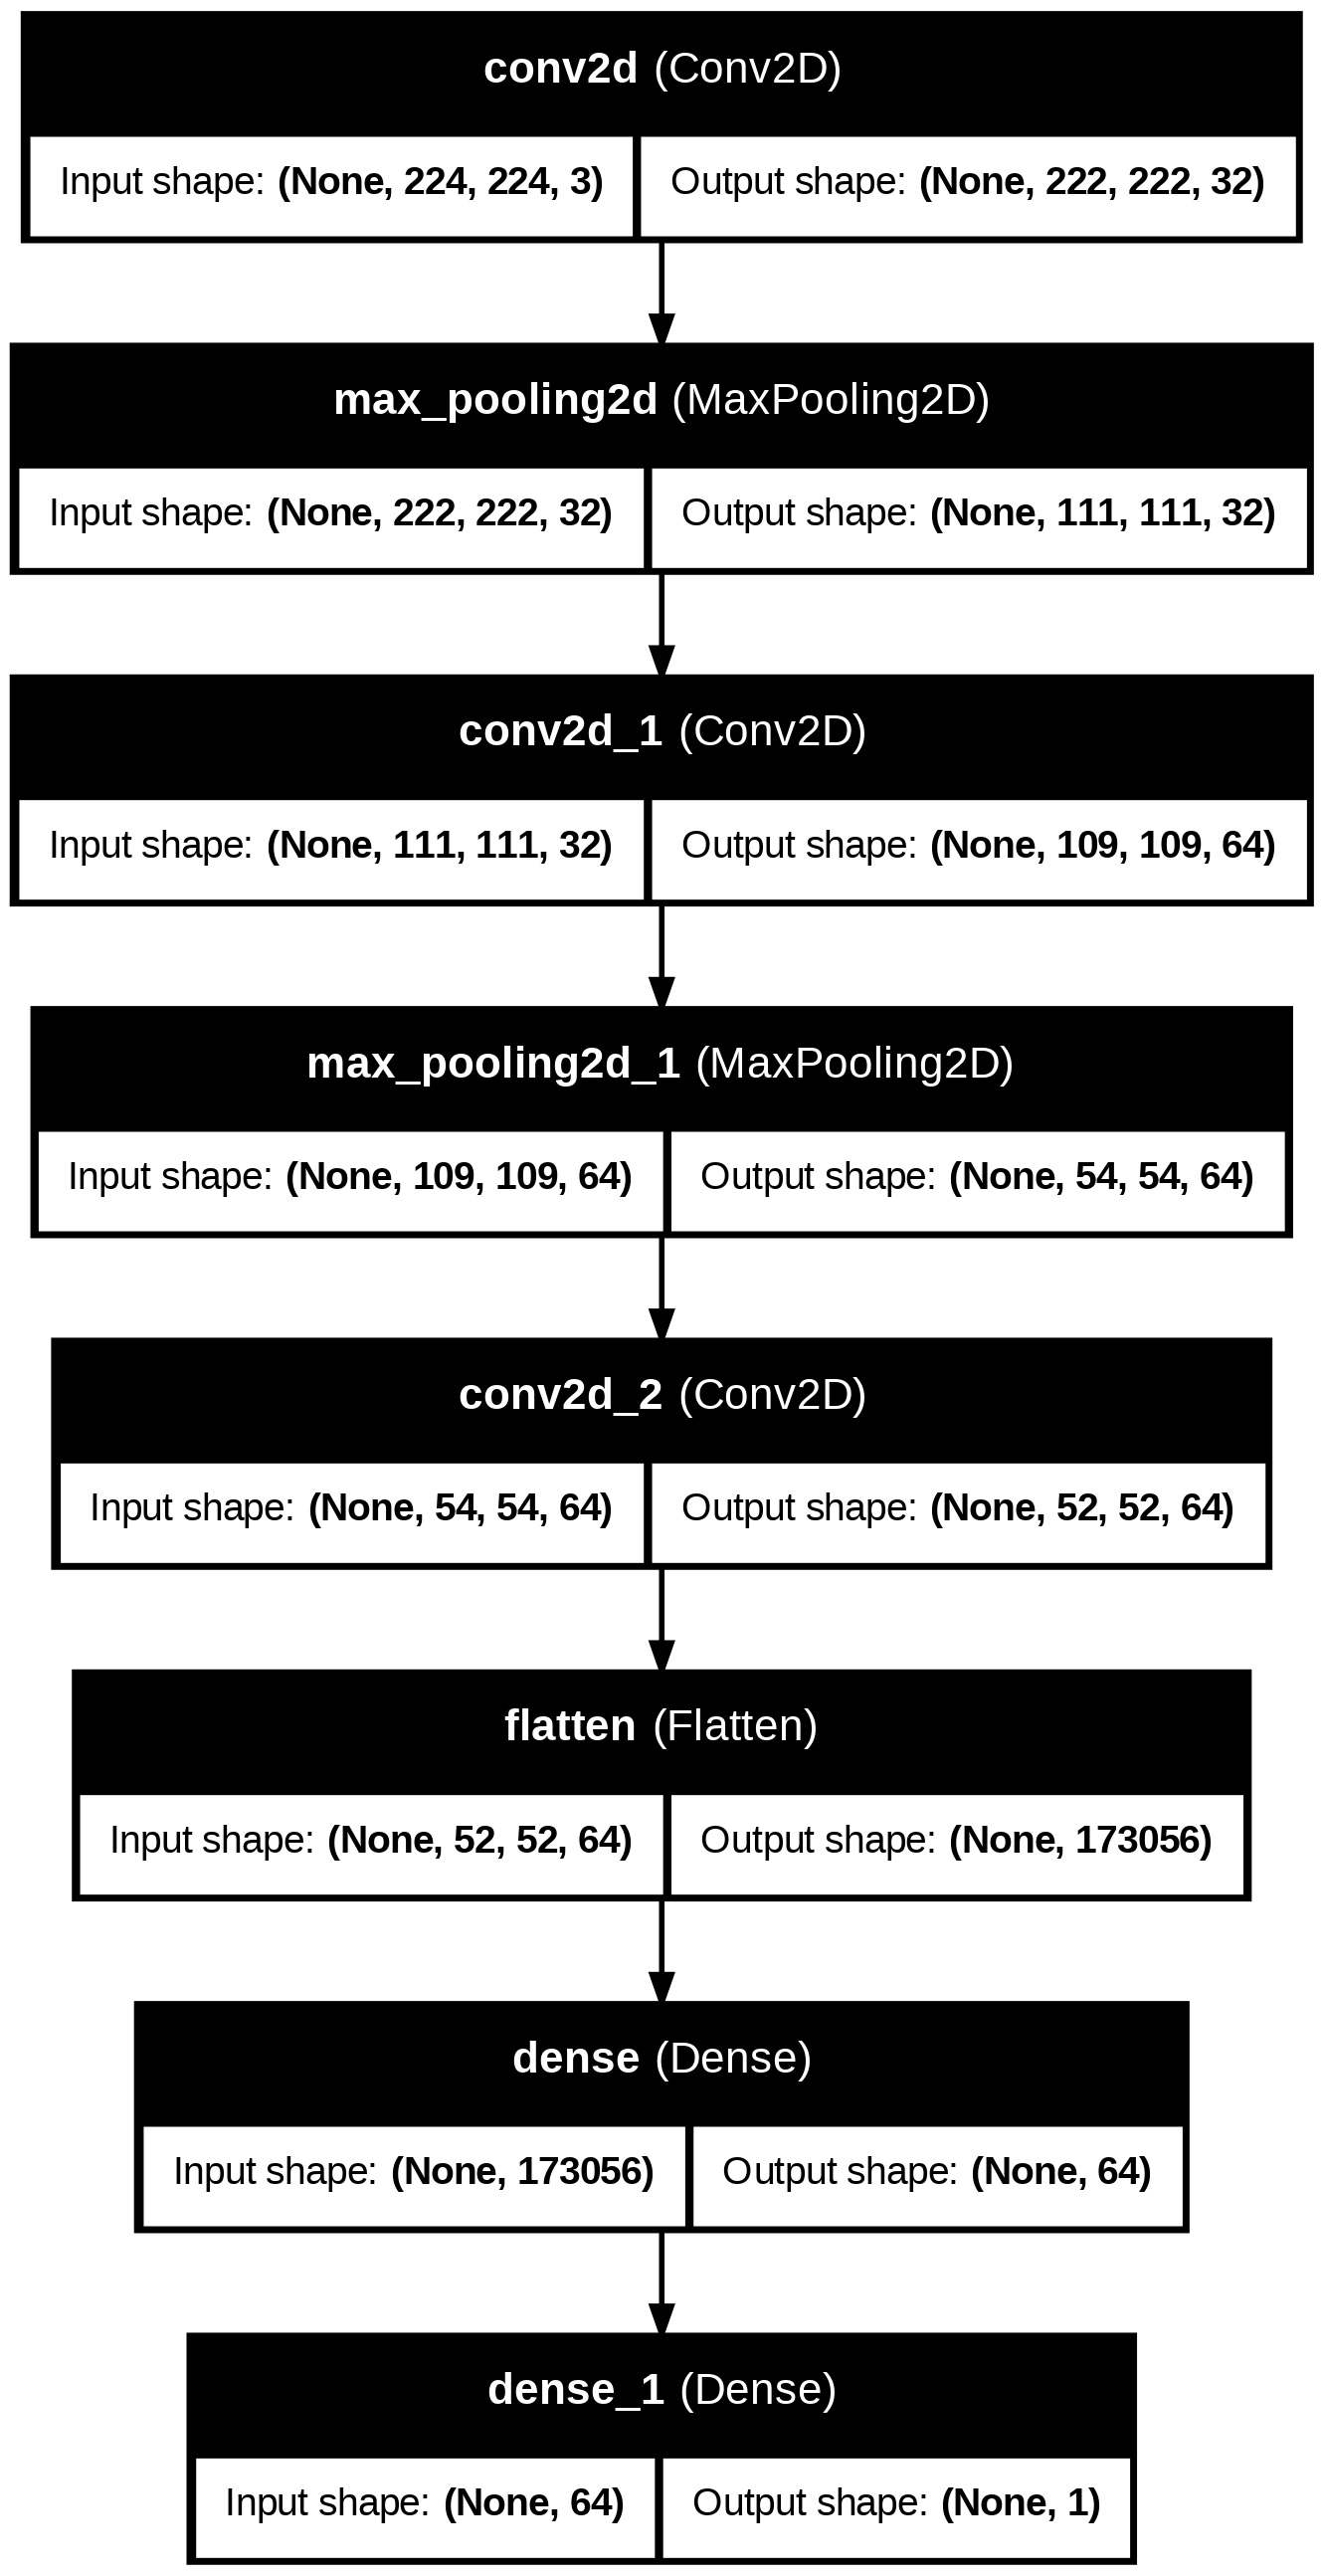

In [ ]:
from tensorflow.keras.utils import plot_model

# Generate the model architecture diagram and save it as a PNG file
plot_model(model, to_file='cnn_model_architecture.png', show_shapes=True, show_layer_names=True)

# Display the diagram
from IPython.display import Image
Image(filename='cnn_model_architecture.png')


In [ ]:
def preprocess_images(files_list):
    images = []
    for file in files_list:
        img = Image.open(file)  # Open the image file
        img = img.convert("RGB")  # Convert to RGB to ensure 3 channels
        img_resized = img.resize((224, 224))  # Resize to match model input size
        img_array = img_to_array(img_resized)  # Convert to numpy array
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        images.append(img_array)
    return np.vstack(images)


In [ ]:
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
from PIL import Image

# Create CNN model
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Example to fit the model
model = create_model()

# Assuming images and labels are predefined and processed.
# model.fit(images, labels, epochs=5, batch_size=32)


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from google.colab import files
from PIL import Image

# Step 1: Upload images (Acne and Non-Acne)
# Upload acne images
print("Upload Acne Images:")
uploaded_acne_files = files.upload()

# Upload non-acne images
print("Upload Non-Acne Images:")
uploaded_non_acne_files = files.upload()

# Step 2: Preprocess Images
def preprocess_images(files_list):
    images = []
    for file in files_list:
        img = Image.open(file)  # Open the image file
        img = img.convert("RGB")  # Convert to RGB to ensure 3 channels
        img_resized = img.resize((224, 224))  # Resize to match model input size
        img_array = img_to_array(img_resized)  # Convert to numpy array
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        images.append(img_array)
    return np.vstack(images)

acne_images = preprocess_images(uploaded_acne_files.keys())
non_acne_images = preprocess_images(uploaded_non_acne_files.keys())

# Step 3: Prepare Data Labels
acne_labels = np.ones(acne_images.shape[0])
non_acne_labels = np.zeros(non_acne_images.shape[0])

# Combine images and labels
images = np.vstack((acne_images, non_acne_images))
labels = np.concatenate((acne_labels, non_acne_labels))

# Step 4: Build the CNN Model
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 5: Train the Model
model = create_model()
model.fit(images, labels, epochs=5, batch_size=32)

# Now, you can proceed to make predictions as shown in your original code


Upload Acne Images:


Saving rosacea-nose-6.jpg to rosacea-nose-6.jpg
Saving rosacea-nose-7.jpg to rosacea-nose-7.jpg
Saving rosacea-nose-49.jpg to rosacea-nose-49.jpg
Saving rosacea-steroid-1.jpg to rosacea-steroid-1.jpg
Saving rosacea-steroid-8.jpg to rosacea-steroid-8.jpg
Saving sn7_commonacne-8col.ashx to sn7_commonacne-8col.ashx
Saving teenage-skin-problems-183876012-5a245c86494ec900372b6366 (2).jpg to teenage-skin-problems-183876012-5a245c86494ec900372b6366 (2).jpg
Saving teenage-skin-problems-183876012-5a245c86494ec900372b6366.jpg to teenage-skin-problems-183876012-5a245c86494ec900372b6366.jpg
Saving tr0muse3x9yz.png to tr0muse3x9yz.png
Saving tumblr_npa77rk2UW1r8l3gko1_400 (1).png to tumblr_npa77rk2UW1r8l3gko1_400 (1).png
Saving tumblr_npa77rk2UW1r8l3gko1_400.png to tumblr_npa77rk2UW1r8l3gko1_400.png
Saving tumblr_ov7rm75Zwo1wuhvt8o1_640.jpg to tumblr_ov7rm75Zwo1wuhvt8o1_640.jpg
Saving u06kz58buhi11.png to u06kz58buhi11.png
Saving uaxnc5tsay351.jpg to uaxnc5tsay351.jpg
Saving unnamed (1).jpg to unna

Saving images (14).jpeg to images (14).jpeg
Saving images (13).jpeg to images (13).jpeg
Saving images (12).jpeg to images (12).jpeg
Saving images (11).jpeg to images (11).jpeg
Saving images (10).jpeg to images (10).jpeg
Saving images (9).jpeg to images (9).jpeg
Saving images (8).jpeg to images (8).jpeg
Saving images (7).jpeg to images (7).jpeg
Saving images (6).jpeg to images (6).jpeg
Saving images (5).jpeg to images (5).jpeg
Saving images (4).jpeg to images (4).jpeg
Saving images (3).jpeg to images (3).jpeg
Saving images (2).jpeg to images (2).jpeg
Saving images (1).jpeg to images (1).jpeg
Saving images.jpeg to images.jpeg
Saving download (1).jpeg to download (1).jpeg
Saving download.jpeg to download.jpeg
Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 840ms/step - accuracy: 0.5559 - loss: 739.4816
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 830ms/step - accuracy: 0.4545 - loss: 4031.8059
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 786ms/step - accuracy: 0.5351 - loss: 357.0775
Epoch 4/5
2/2 ━━━━━━━━━━━━━━

In [ ]:
def classify_images(files_list):
    predictions = []
    for file in files_list:
        new_image = Image.open(file)  # Open the uploaded new image
        new_image = new_image.convert("RGB")  # Convert to RGB to ensure 3 channels
        new_image_resized = new_image.resize((224, 224))  # Resize to match model input size
        new_image_array = img_to_array(new_image_resized)
        new_image_array = np.expand_dims(new_image_array, axis=0)  # Add batch dimension

        # Predict the class of the new image
        prediction = model.predict(new_image_array)

        # Append the result to predictions
        if prediction[0] > 0.5:
            predictions.append((file, "Acne"))
        else:
            predictions.append((file, "Non-Acne"))
    return predictions


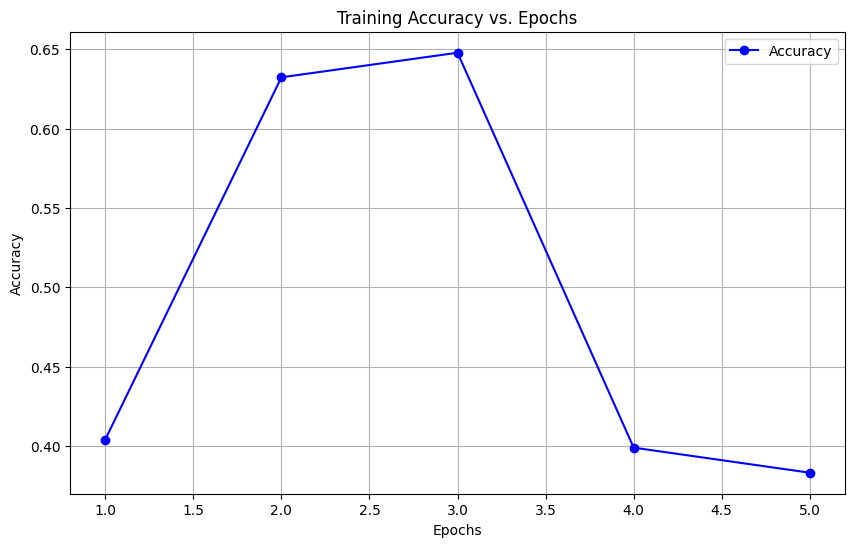

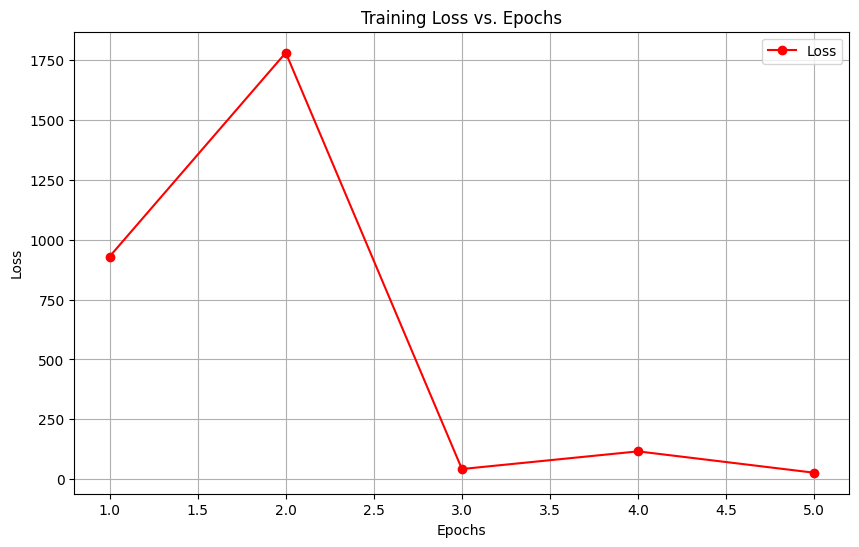

In [ ]:
import matplotlib.pyplot as plt

# Example training accuracy and loss values (replace with actual values from your training process)
epochs = [1, 2, 3, 4, 5]
accuracy = [0.4041, 0.6323, 0.6478, 0.3990, 0.3832]
loss = [929.9308, 1781.8500, 41.7459, 115.5767, 26.3051]

# Plotting the accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, marker='o', label='Accuracy', color='blue')
plt.title('Training Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Plotting the loss graph
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, marker='o', label='Loss', color='red')
plt.title('Training Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()
